<a href="https://colab.research.google.com/github/ani-91/CS-F407-project/blob/main/AI_astar_aco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# A* Algorithm

In [ ]:
pip install seaborn


Cost from HYDERABAD to DELHI: 100815


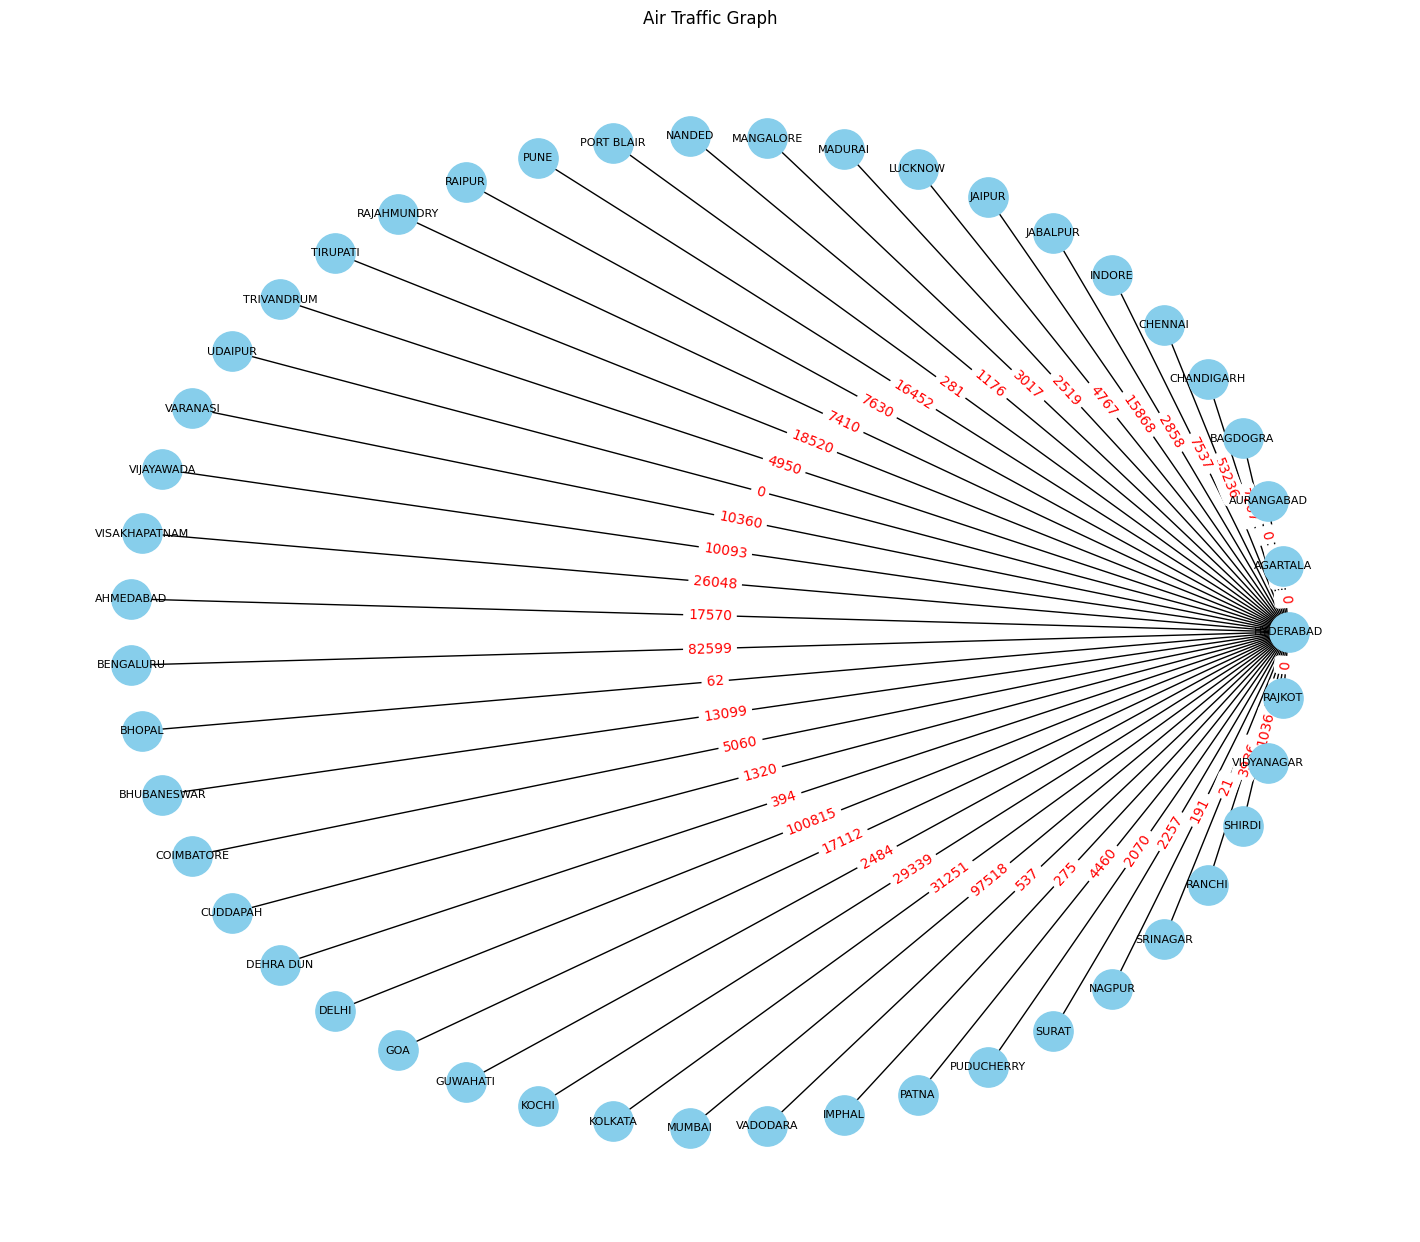

Busiest Cities: ['HYDERABAD', 'DELHI', 'MUMBAI']


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

class AirTrafficGraph:
    def __init__(self, data):
        self.data = data
        self.city_mapping = {city: index for index, city in enumerate(np.unique(np.concatenate([data[:, 2], data[:, 3]])))}
        self.reverse_city_mapping = {index: city for city, index in self.city_mapping.items()}
        self.graph = self.build_graph()

    def build_graph(self):
        graph = nx.Graph()
        for row in self.data:
            city1, city2, passengers = row[2], row[3], row[4]
            graph.add_edge(city1, city2, weight=passengers)
        return graph

    def heuristic(self, city, goal_city):
        # Assuming a simple heuristic: straight-line distance
        return 0

    def a_star_search(self, start_city, goal_city):
        priority_queue = PriorityQueue()
        priority_queue.put((0, start_city))

        explored = set()

        while not priority_queue.empty():
            cost, current_city = priority_queue.get()

            if current_city == goal_city:
                return cost

            if current_city not in explored:
                explored.add(current_city)

                for neighbor in self.graph.neighbors(current_city):
                    if neighbor not in explored:
                        weight = self.graph.get_edge_data(current_city, neighbor)['weight']
                        heuristic = self.heuristic(neighbor, goal_city)
                        total_cost = cost + weight + heuristic
                        priority_queue.put((total_cost, neighbor))

        return float('inf')

    def visualize_graph(self):
        pos = nx.circular_layout(self.graph)  # Use circular layout
        labels = {city: city for city in self.reverse_city_mapping.values()}

        plt.figure(figsize=(14, 12))
        nx.draw(self.graph, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', font_size=8, font_color='black')
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color='red')

        plt.title("Air Traffic Graph")
        plt.show()

    def busiest_cities(self):
        city_passengers = np.zeros(len(self.city_mapping))
        for row in self.data:
            city1, city2, passengers = row[2], row[3], row[4]
            city_passengers[self.city_mapping[city1]] += passengers
            city_passengers[self.city_mapping[city2]] += passengers

        busiest_city_indices = np.argsort(city_passengers)[::-1][:3]
        busiest_cities = [self.reverse_city_mapping[index] for index in busiest_city_indices]
        return busiest_cities

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/dataset/Air_traffic.csv")

# Drop NaN values if needed
datapm1 = df.dropna()

# Convert the DataFrame to a NumPy array
datanp = datapm1.to_numpy()

# Example usage:
graph = AirTrafficGraph(datanp)
start_city = "HYDERABAD" if "HYDERABAD" in graph.city_mapping else next(iter(graph.city_mapping))
goal_city = "DELHI" if "DELHI" in graph.city_mapping else next(iter(graph.city_mapping))
cost = graph.a_star_search(start_city, goal_city)
print(f"Cost from {start_city} to {goal_city}: {cost}")

# Visualize the graph with circular layout
graph.visualize_graph()

# Find the busiest cities
busiest_cities = graph.busiest_cities()
print(f"Busiest Cities: {busiest_cities}")


Getting a graphical depiction

# Ant Colony Optimization (ACO) Algorithm

In [ ]:
import numpy as np
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/dataset/Air_traffic.csv")

# Drop NaN values if needed
datapm1 = df.dropna()

# Convert the DataFrame to a NumPy array
datanp = datapm1.to_numpy()

# Parameters for the Ant Colony Optimization algorithm
num_ants = 5
num_iterations = 30
pheromone_decay = 0.5
alpha = 1.0  # Pheromone influence
beta = 2.0   # Heuristic influence

# Initialize pheromone levels on each edge
num_flights = len(datanp)
pheromones = np.ones(num_flights)

# Identify the correct column index for the number of passengers
# Assuming "PASSENGERS TO CITY 2" is the column of interest
passenger_column_index = datapm1.columns.get_loc("PASSENGERS TO CITY 2")

# Define a small constant to avoid division by zero
epsilon = 1e-10

# Define a function to calculate the attractiveness of each flight
def attractiveness(flight):
    return (pheromones[flight] ** alpha) * ((1 / (datanp[flight, passenger_column_index] + epsilon)) ** beta)

# Ant Colony Optimization algorithm
for iteration in range(num_iterations):
    ant_tours = np.zeros((num_ants, num_flights), dtype=int)

    for ant in range(num_ants):
        current_city = np.random.randint(num_flights)
        ant_tours[ant, 0] = current_city

        for step in range(1, num_flights):
            # Calculate probabilities for moving to the next flight
            probabilities = np.zeros(num_flights)
            for flight in range(num_flights):
                if flight not in ant_tours[ant, :step]:
                    probabilities[flight] = attractiveness(flight)

            # Choose the next flight based on probabilities
            probabilities /= probabilities.sum() if probabilities.sum() > 0 else 1.0
            current_city = np.random.choice(range(num_flights), p=probabilities)
            ant_tours[ant, step] = current_city

    # Update pheromone levels based on ant tours
    pheromones *= (1 - pheromone_decay)
    for ant in range(num_ants):
        for step in range(num_flights - 1):
            pheromones[ant_tours[ant, step]] += datanp[ant_tours[ant, step], passenger_column_index]

# After the algorithm converges, the pheromone levels represent the likelihood of each flight being chosen
# Find the flight index with the highest number of passengers
busiest_flight_index = np.argmax(pheromones)

# Extract details of the busiest flight from the CSV file
busiest_flight_details = df.iloc[busiest_flight_index]

# Print the results
print(f"Flight Index with Highest Total Passengers: {busiest_flight_index}")
print("Flight Details:")
print(busiest_flight_details)
print(f"Pheromone Level: {pheromones[busiest_flight_index]}")


Flight Index with Highest Total Passengers: 286
Flight Details:
Year                           2017
Month                           May
CITY 1                    HYDERABAD
CITY 2                        DELHI
PASSENGERS TO CITY 2         105850
PASSENGERS FROM CITY 2       114562
Name: 286, dtype: object
Pheromone Level: 1018799.7249570685


Getting pheromone levels for all

In [ ]:
import pandas as pd

# Assuming pheromones is the array containing pheromone levels
# If not, replace it with the appropriate variable name

# Create a DataFrame with flight indices and corresponding pheromone levels
pheromones_df = pd.DataFrame({'Flight Index': range(num_flights), 'Pheromone Level': pheromones})

# Display the DataFrame
print(pheromones_df)


     Flight Index  Pheromone Level
0               0     4.900000e+02
1               1     1.461000e+04
2               2     9.313226e-10
3               3     4.195000e+04
4               4     4.888600e+05
..            ...              ...
371           371     2.933900e+05
372           372     3.940000e+03
373           373     9.348000e+05
374           374     2.484000e+04
375           375     1.711200e+05

[376 rows x 2 columns]


Getting a graphical depiction

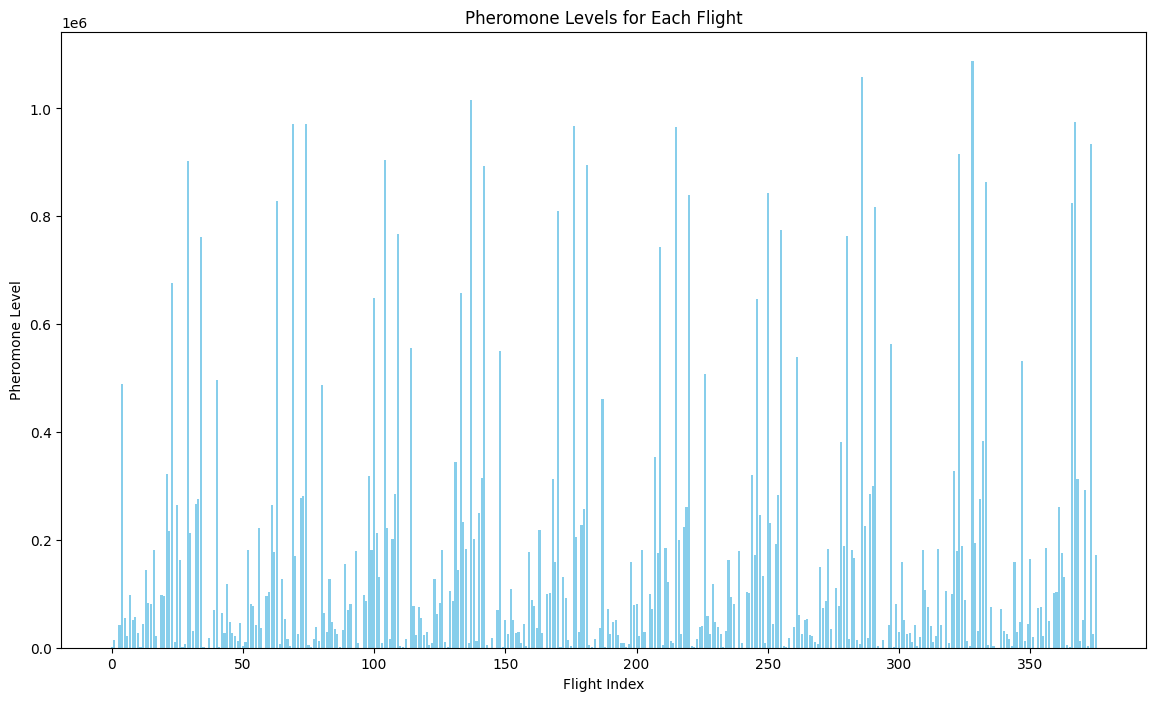

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming num_flights is defined somewhere in your code
# If not, you may need to replace it with the appropriate value
# num_flights = ...

# Create an array of flight indices
flight_indices = np.arange(num_flights)

# Plot a bar chart of pheromone levels
plt.figure(figsize=(14, 8))
plt.bar(flight_indices, pheromones, color='skyblue')
plt.xlabel('Flight Index')
plt.ylabel('Pheromone Level')
plt.title('Pheromone Levels for Each Flight')
plt.show()
